# Create Benchmark and Exponential Smoothing

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tsa.arima.model import ARIMA
%load_ext autoreload 
%autoreload 2
import functions as fun
#from sklearn.metrics import negative_log_likelyhood

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [69]:
# # 
# dataset = pd.read_csv('training_data.csv')
# dataset = dataset.drop(['Unnamed: 0'], axis = 1)
# dataset.plot(subplots=True, layout=(14, 4), figsize=(24, 12))
# dataset.head()

In [70]:
dataset = pd.read_csv('target.csv')

In [71]:
features = pd.read_csv('features.csv')
features.head()

,Unnamed: 0,epoch_utc,datetime_de,windon_forecast,windoff_forecast,solar_forecast,prices_forecast,aggregated_generation_forecast,AT_import,AT_export,...,day_of_week_mon,day_of_week_sat,day_of_week_sun,day_of_week_thu,day_of_week_tue,day_of_week_wed,hour_of_day_sin,hour_of_day_cos,hour_of_year_sin,hour_of_year_cos
0,0,1.546297e+09,2018-12-31 23:00:00+00:00,18879.75,5069.00,0.0,28.32,57054.0,61.0,4940.0,...,1,0,0,0,0,0,-0.258819,0.965926,-0.000717,1.000000
1,1,1.546301e+09,2019-01-01 00:00:00+00:00,20626.50,5042.25,0.0,10.07,57400.0,60.0,5073.0,...,0,0,0,0,1,0,0.000000,1.000000,0.000000,1.000000
2,2,1.546304e+09,2019-01-01 01:00:00+00:00,22355.50,5028.50,0.0,-4.08,57275.0,20.0,4284.0,...,0,0,0,0,1,0,0.258819,0.965926,0.000717,1.000000
3,3,1.546308e+09,2019-01-01 02:00:00+00:00,24032.50,4977.75,0.0,-9.91,58024.0,3.0,4273.0,...,0,0,0,0,1,0,0.500000,0.866025,0.001435,0.999999
4,4,1.546312e+09,2019-01-01 03:00:00+00:00,25452.00,4907.25,0.0,-7.41,59301.0,0.0,4961.0,...,0,0,0,0,1,0,0.707107,0.707107,0.002152,0.999998


In [72]:
dataset.index = features.datetime_de
dataset['idx'] = features.index

In [73]:
dataset

,Unnamed: 0,emission_factor,idx
datetime_de,,,
2018-12-31 23:00:00+00:00,0,298.240217,0
2019-01-01 00:00:00+00:00,1,266.522473,1
2019-01-01 01:00:00+00:00,2,262.594215,2
2019-01-01 02:00:00+00:00,3,260.190772,3
2019-01-01 03:00:00+00:00,4,250.496683,4
...,...,...,...
2023-03-12 18:00:00+00:00,36763,332.493884,36763
2023-03-12 19:00:00+00:00,36764,317.253111,36764
2023-03-12 20:00:00+00:00,36765,308.394838,36765


In [74]:
dataset_2022 = dataset['2018-12-31 23:00:00+00:00' : '2022-12-31 23:00:00+00:00']
#features_2022 = features['2018-12-31 23:00:00+00:00' : '2022-12-31 23:00:00+00:00']

In [75]:
dataset_2022

,Unnamed: 0,emission_factor,idx
datetime_de,,,
2018-12-31 23:00:00+00:00,0,298.240217,0
2019-01-01 00:00:00+00:00,1,266.522473,1
2019-01-01 01:00:00+00:00,2,262.594215,2
2019-01-01 02:00:00+00:00,3,260.190772,3
2019-01-01 03:00:00+00:00,4,250.496683,4
...,...,...,...
2022-12-31 19:00:00+00:00,35060,195.617034,35060
2022-12-31 20:00:00+00:00,35061,196.523798,35061
2022-12-31 21:00:00+00:00,35062,199.292403,35062


In [76]:
date =pd.to_datetime(features.datetime_de)
date.head()

0   2018-12-31 23:00:00+00:00
1   2019-01-01 00:00:00+00:00
2   2019-01-01 01:00:00+00:00
3   2019-01-01 02:00:00+00:00
4   2019-01-01 03:00:00+00:00
Name: datetime_de, dtype: datetime64[ns, UTC]

In [77]:
co2 = dataset_2022['emission_factor']
co2.index = dataset_2022.idx
cols_features = [c for c in dataset.columns if c != 'emission_factor']
cols = {c: i for i, c in enumerate(dataset.columns)}
indices = {ind: i for i, ind in enumerate(dataset.index)}
#features = dataset.loc[:, [j for j in cols if j != 'emission_factor' and j in cols_features]]

In [78]:
co2
#plt.plot(co2)

idx
0        298.240217
1        266.522473
2        262.594215
3        260.190772
4        250.496683
            ...    
35060    195.617034
35061    196.523798
35062    199.292403
35063    194.357142
35064    150.310416
Name: emission_factor, Length: 35065, dtype: float64

In [79]:
features.head()

,Unnamed: 0,epoch_utc,datetime_de,windon_forecast,windoff_forecast,solar_forecast,prices_forecast,aggregated_generation_forecast,AT_import,AT_export,...,day_of_week_mon,day_of_week_sat,day_of_week_sun,day_of_week_thu,day_of_week_tue,day_of_week_wed,hour_of_day_sin,hour_of_day_cos,hour_of_year_sin,hour_of_year_cos
0,0,1.546297e+09,2018-12-31 23:00:00+00:00,18879.75,5069.00,0.0,28.32,57054.0,61.0,4940.0,...,1,0,0,0,0,0,-0.258819,0.965926,-0.000717,1.000000
1,1,1.546301e+09,2019-01-01 00:00:00+00:00,20626.50,5042.25,0.0,10.07,57400.0,60.0,5073.0,...,0,0,0,0,1,0,0.000000,1.000000,0.000000,1.000000
2,2,1.546304e+09,2019-01-01 01:00:00+00:00,22355.50,5028.50,0.0,-4.08,57275.0,20.0,4284.0,...,0,0,0,0,1,0,0.258819,0.965926,0.000717,1.000000
3,3,1.546308e+09,2019-01-01 02:00:00+00:00,24032.50,4977.75,0.0,-9.91,58024.0,3.0,4273.0,...,0,0,0,0,1,0,0.500000,0.866025,0.001435,0.999999
4,4,1.546312e+09,2019-01-01 03:00:00+00:00,25452.00,4907.25,0.0,-7.41,59301.0,0.0,4961.0,...,0,0,0,0,1,0,0.707107,0.707107,0.002152,0.999998


#### inspect co2 data and make train, test, val split

In [80]:
co2.describe() 

count    35065.000000
mean       475.324718
std        143.806543
min        150.310416
25%        370.647380
50%        484.372996
75%        587.043152
max        822.653306
Name: emission_factor, dtype: float64

In [102]:
train_ratio = 0.7
val_ratio = 0.9
#test_ratio = 0.1

n = len(co2)
#assert(n == len(features))
co2_train = co2[0:int(n*train_ratio)]
co2_long_train = co2[0:int(n*val_ratio)+3]
co2_val = co2[int(n*train_ratio):int(n*val_ratio)+3]
co2_test = co2[int(n*val_ratio)+3:]
date_test = date[int(n*val_ratio)+3:len(co2)]
co2_test_plot = co2_test.copy()
co2_test_plot.index = co2[:len(co2_test)].index
#assert(len(co2_train) == int(train_ratio*len(features)))

## statsistcal case
co2_stat = co2[0:len(co2)-24]
co2_stat_test = co2[len(co2)-24:]


In [92]:
len(co2[int(n*val_ratio) + 3 :] ) / 24

146.0

In [93]:
assert(len(co2_stat_test) == 24)

In [94]:
co2_train.describe()

count    24545.000000
mean       455.275245
std        138.471578
min        150.882862
25%        350.452261
50%        465.222585
75%        565.721724
max        782.462741
Name: emission_factor, dtype: float64

#### create simple average model

In [95]:
simple_average_co2 = fun.simple_average(co2_long_train)
print(simple_average_co2)

467.61505363276615


In [96]:
forecast_period = 24
co2_test_simple_average, pred_avg = fun.pred_avg(co2,co2_test, forecast_period)
print(pred_avg)

MAE for Simple moving average: 137.08 g_CO2/kWh
MAPE for Simple moving average: 26.729999999999997 %
RMSE for Simple moving average: 161.66 g_CO2/kWh
R2 Simple moving average: -25.88 %


In [97]:
rep_test_simple_avg = fun.evaluation_without_uncertainty(co2_test,co2_test_simple_average, method = 'simple_average')
print(rep_test_simple_avg)

MAE for simple_average: 137.08 g_CO2/kWh
MAPE for simple_average: 29.04 %
RMSE for simple_average: 161.66 g_CO2/kWh
R2 simple_average: -516756.87 %


In [98]:
co2_test_simple_average_df = pd.DataFrame(co2_test_simple_average)
co2_test_simple_average_df.index = co2_test.index
co2_test_simple_average_df.head()

,0
idx,
31561,467.615054
31562,467.615054
31563,467.615054
31564,467.615054
31565,467.615054


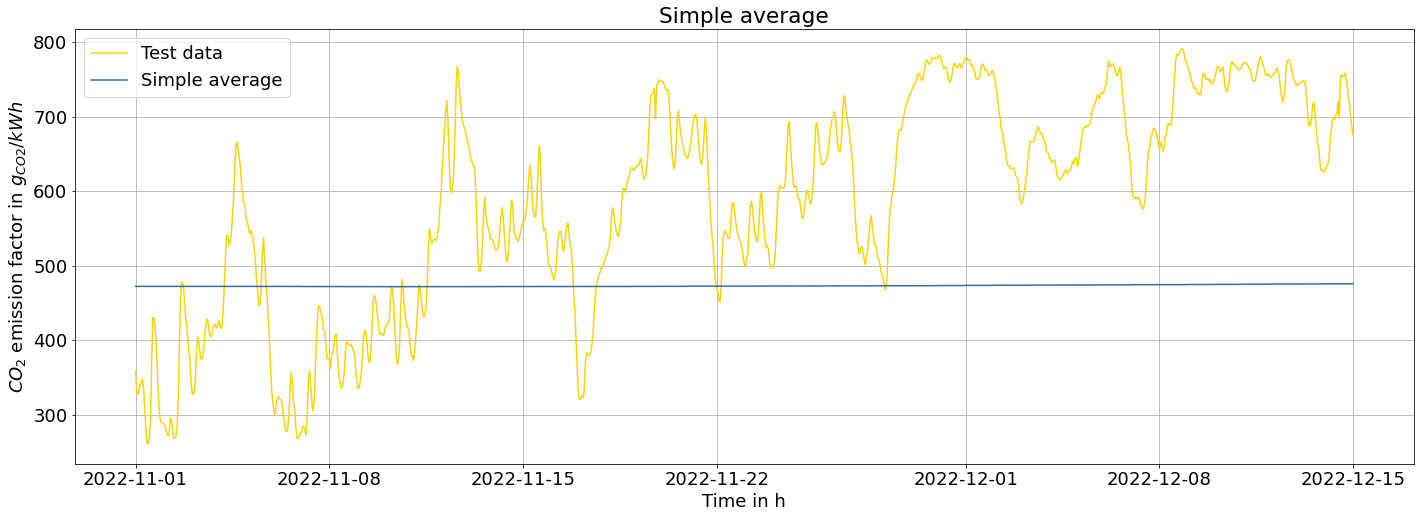

In [105]:
fun.plot_model(co2_test, co2_test_simple_average_df,date_test, slice_start = '2022-11-01 00:00', slice_end =  '2022-12-15 00:00', method='Simple average')

### create naive model

In [106]:
naive_co2 = fun.naive(co2_long_train)
#testing
co2_test_naive = fun.naive_forecast(co2_test, co2_long_train)
assert(len(co2_test_naive) == len(co2_test))

In [52]:
rep_naive_test = fun.evaluation_without_uncertainty(co2_test, co2_test_naive, method = 'naive')
print(rep_naive_test)

MAE for naive: 221.58 g_CO2/kWh
MAPE for naive: 28.939999999999998 %
RMSE for naive: 263.7 g_CO2/kWh
R2 naive: 0.0 %


In [53]:
co2_test_naive_df = pd.DataFrame(co2_test_naive)
co2_test_naive_df.index = co2_test.index
co2_test_naive_df.head()

,0
idx,
31561,765.613735
31562,765.613735
31563,765.613735
31564,765.613735
31565,765.613735


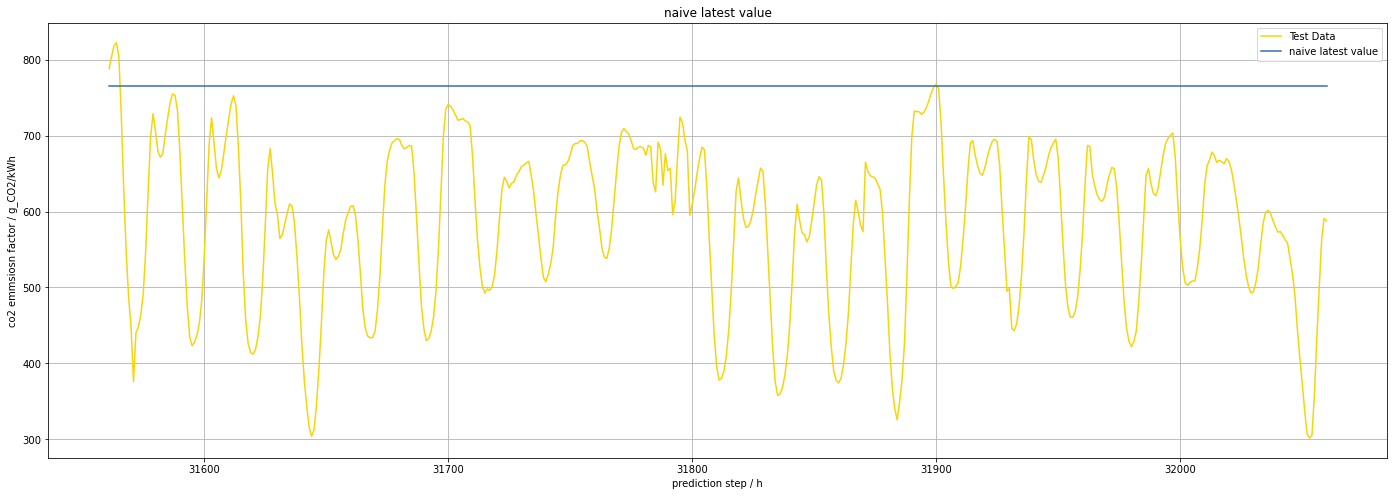

In [54]:
fun.plot_model(co2_test, co2_test_naive_df,0, 500, 'naive latest value')

### Naive 2

In [107]:
forecast_period = 24
naive_test, report_naive_test = fun.naive_forward_forecast(co2_long_train, co2_test, co2, forecast_period)
print(report_naive_test)

31561
idx
31537    596.752065
31538    616.560791
31539    614.491186
31540    616.776082
31541    615.583942
31542    592.384334
31543    539.632736
31544    484.071858
31545    441.186951
31546    423.398319
31547    407.610180
31548    389.269349
31549    376.826539
31550    388.259795
31551    435.907606
31552    502.337517
31553    595.473432
31554    695.805449
31555    763.758102
31556    763.196879
31557    736.458307
31558    726.066968
31559    725.444083
31560    717.397426
Name: emission_factor, dtype: float64
31585
idx
31561    714.958272
31562    722.590911
31563    726.271388
31564    731.781033
31565    718.854321
31566    654.271725
31567    555.507374
31568    465.089136
31569    390.555494
31570    350.438202
31571    334.155502
31572    314.120969
31573    314.776284
31574    333.886122
31575    398.421990
31576    508.643447
31577    630.341286
31578    735.179230
31579    769.496009
31580    773.347795
31581    737.374616
31582    724.846255
31583    737.391012
31

In [108]:
naive_test_df = pd.DataFrame(naive_test)
naive_test_df.head()

,0
0,596.752065
1,616.560791
2,614.491186
3,616.776082
4,615.583942


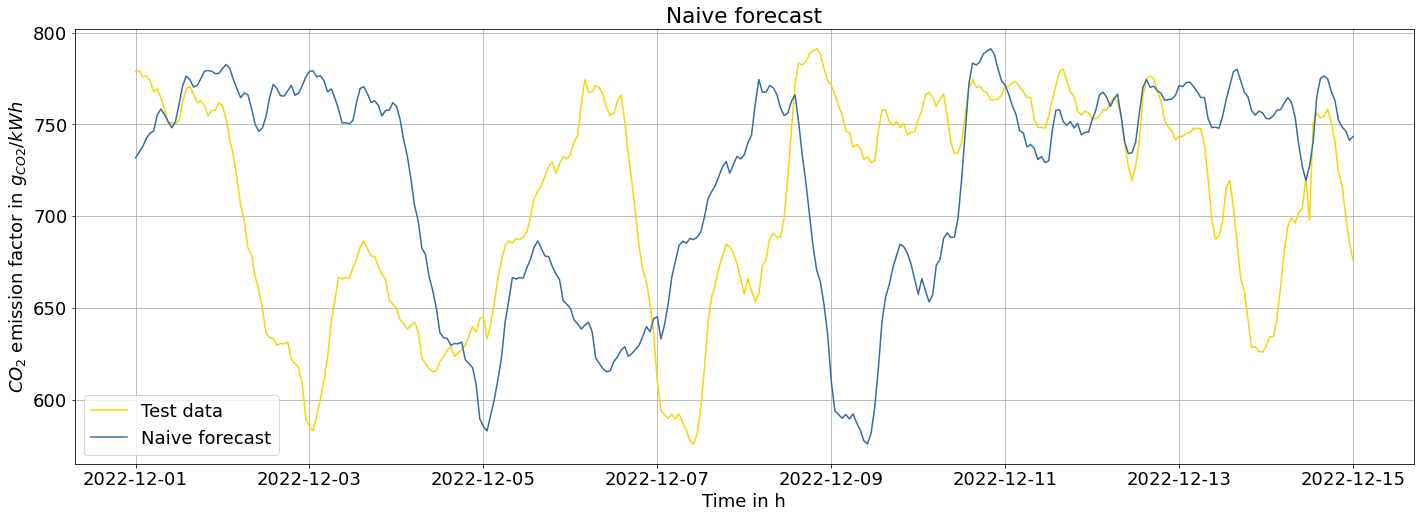

In [109]:
fun.plot_model(co2_test, naive_test_df,date_test, slice_start = '2022-12-01 00:00', slice_end =  '2022-12-15 00:00', method='Naive forecast')

### Simple moving average

In [110]:
forecast_period = 24
sma_window = 4
pred_sma,report_sma = fun.sma_forecast(co2_long_train, co2_test, co2, sma_window, forecast_period)
assert(len(pred_sma) == len(co2_test))
print(report_sma)

MAE for simple moving average: 72.78 g_CO2/kWh
MAPE for simple moving average: 15.15 %
RMSE for simple moving average: 98.06 g_CO2/kWh
R2 simple moving average: 53.690000000000005 %


In [111]:
co2_test_sma_df = pd.DataFrame(pred_sma)
#co2_test_sma_df.index = co2_test.index
co2_test_sma_df.head()

,0
0,741.306404
1,741.306404
2,741.306404
3,741.306404
4,741.306404


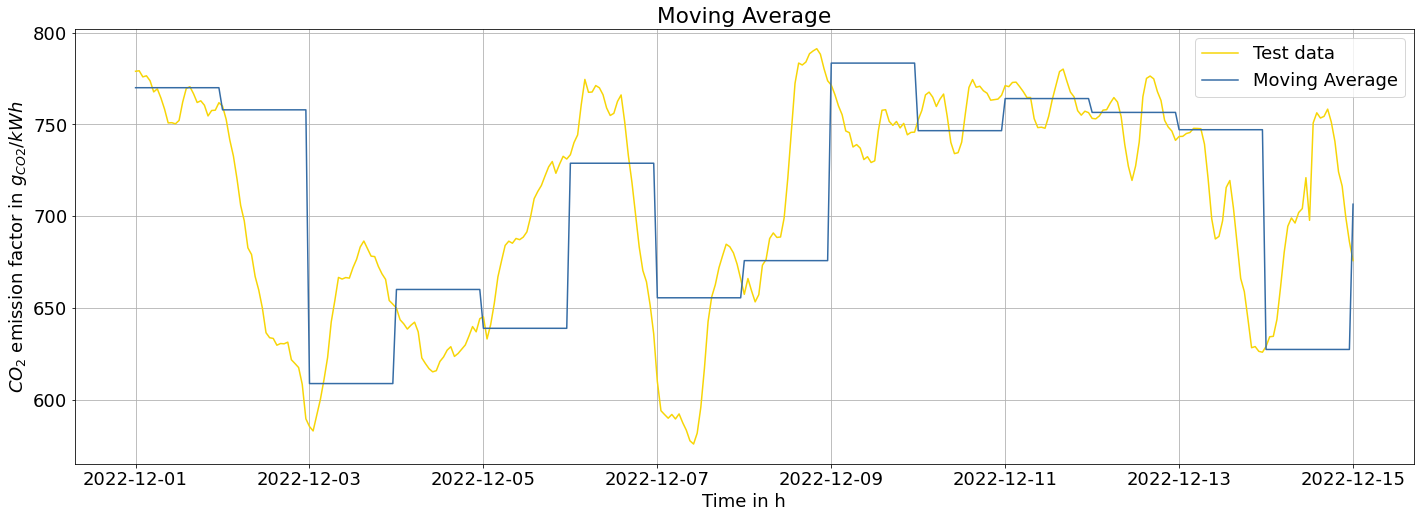

In [112]:
fun.plot_model(co2_test, co2_test_sma_df,date_test, slice_start = '2022-12-01 00:00', slice_end =  '2022-12-15 00:00', method='Moving Average')

### Hold Winter

In [61]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [113]:
co2_train.shape, co2_long_train.shape, co2_val.shape, co2_test.shape

((24545,), (31561,), (7016,), (3504,))

In [114]:
forecast_period = 24
pred_hw,lower_hw,upper_hw,report_hw = fun.walk_forwad_validation_hw(co2_test,co2_long_train,co2, forecast_period, 0.025, 0.95)
print(report_hw)

c:\Users\ABajrami\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
c:\Users\ABajrami\FFE\BMWi-70 InDEED - 01 Intern - 01 Intern\7.WiHi\ABajrami\08_GIT\Github\Master-Thesis-Probabilistic-Day-Ahead-Forecasting-of-the-German-CO2-Emission-Factor\statistical_models\functions.py:249: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(data[j:j+forecast_period])
c:\Users\ABajrami\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
c:\Users\ABajrami\FFE\BMWi-70 InDEED - 01 Intern - 01 Intern\7.WiHi\ABajrami\08_GIT\Github\Master-Thesis-Probabilistic-Day-Ahead-Forecasting-of-the-German-CO2-Emission-Factor\statistical_models\functions.py:249: FutureWarning: The series.append

MAE for Exponential Smoothing: 69.8 g_CO2/kWh
MAPE for Exponential Smoothing: 14.06 %
RMSE for Exponential Smoothing: 91.07 g_CO2/kWh
Pinball for lower Quantile Exponential Smoothing: 4.9 g_CO2/kWh
Pinball for higher Quantile Exponential Smoothing: 12.13 g_CO2/kWh
Interval Score Exponential Smoothing: 291.7637 g_CO2/kWh
Real Values insisde PI Exponential Smoothing: 84.82 %
R2 Exponential Smoothing: 60.06 %
Adjusted R2 Exponential Smoothing: 59.69 %


c:\Users\ABajrami\FFE\BMWi-70 InDEED - 01 Intern - 01 Intern\7.WiHi\ABajrami\08_GIT\Github\Master-Thesis-Probabilistic-Day-Ahead-Forecasting-of-the-German-CO2-Emission-Factor\statistical_models\functions.py:249: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(data[j:j+forecast_period])


In [115]:
pred_hw_df = pd.DataFrame(pred_hw)
pred_hw_df.head()

,0
0,759.736050
1,758.260856
2,747.410442
3,741.131441
4,723.034038


In [117]:
lower_hw_df = pd.DataFrame(lower_hw)
lower_hw_df.head()

,0
0,690.206475
1,663.385862
2,643.915192
3,615.202419
4,590.092247


In [118]:
upper_hw_df = pd.DataFrame(upper_hw)
upper_hw_df.head()

,0
0,815.767489
1,837.697844
2,840.784438
3,842.349854
4,840.897382


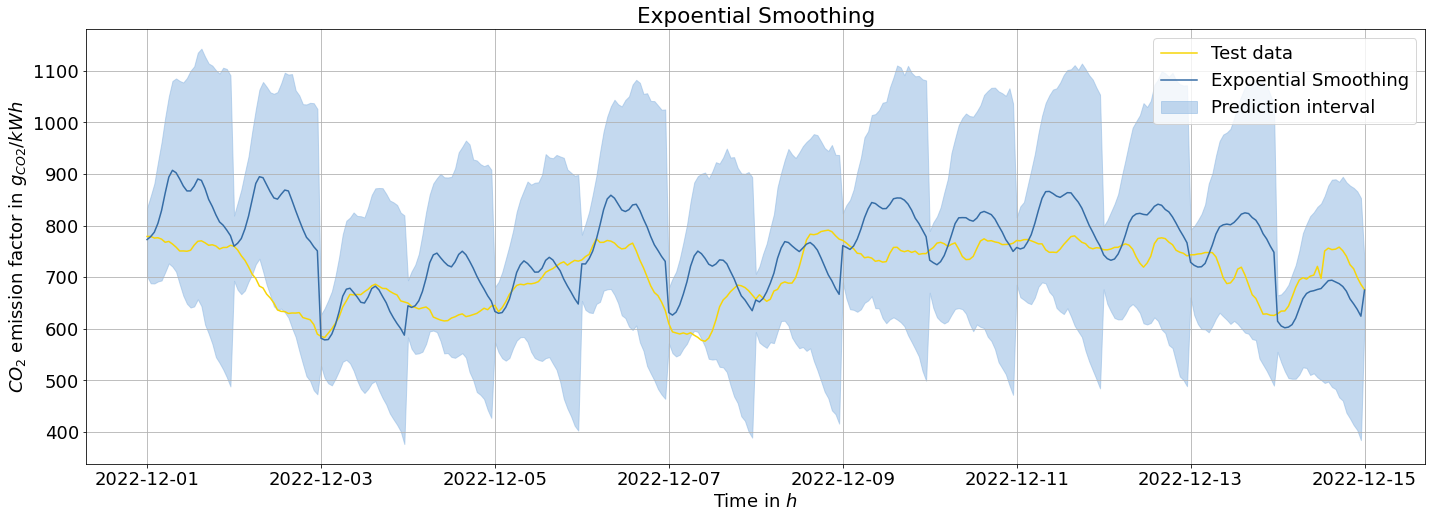

In [119]:
fun.plot_model_uncertainty(co2_test, pred_hw_df,lower_hw_df, upper_hw_df,  date_test, slice_start = '2022-12-01 00:00', slice_end =  '2022-12-15 00:00', method = 'Expoential Smoothing')